In [1]:
import os
os.chdir('/home/jupyter/ntu/csie-cv/hw10')
from PIL import Image
import numpy as np
import copy
from IPython.display import display
from math import sqrt

In [2]:
def load_image(path='./lena.bmp'):
    img = Image.open(path)
    img_array = np.array(img)
    width, height = img_array.shape
    img_list = img_array.tolist()
    return copy.deepcopy(img_list), width, height

img, width, height = load_image('./lena.bmp')

In [3]:
def save_image(img, path='./lena.bmp'):
    img_ = Image.fromarray(np.array(img, dtype='uint8'), mode='L')
    img_.save(path)
    return img_

def zeros(height, width):
    return [ [0 for x in range(width)] for y in range(height)]

def img_pad(img, height=height, width=width):
    pad = zeros(height+2, width+2)
    for y in range(height):
        for x in range(width):
            pad[y+1][x+1] = img[y][x]

    for y in range(height): 
        pad[y+1][0] = img[y][0]
        pad[y+1][width+1] = img[y][width-1]

    # left, right column padding
    for x in range(width+2):
        pad[0][x] = pad[1][x]
        pad[height+1][x] =pad[height][x]
    return pad

def img_pad_ntimes(img, n=1, height=height, width=width):
    for i in range(n):
        img = img_pad(img, height+i*2, width+i*2)
    return img

def convolution(img, kernels, n=1, height=height, width=width, map=lambda x:x):
    img = img_pad_ntimes(img, n, height, width)
    convoluted = zeros(height, width)
    for y in range(height):
        for x in range(width):
            knl_results = []
            for kernel in kernels:
                m = sum([img[y+n+y_][x+n+x_]*s for (y_, x_), s in kernel.items()])
                knl_results.append(m)

            convoluted[y][x] = map(*knl_results)

    return convoluted

def zero_crossing(img, kernel, n=1, height=height, width=width):
    def map(px, neighbor):
        
        if px == 1 and (-1 in neighbor):
            return 0
        elif px == -1 and (1 in neighbor):
            return 255
        else:
            return 255

    img = img_pad_ntimes(img, n, height, width)
    convoluted = zeros(height, width)
    for y in range(height):
        for x in range(width):
            knl_results = [img[y+n+y_][x+n+x_] for y_, x_ in kernel]
            convoluted[y][x] = map(img[y+n][x+n], knl_results)

    return convoluted

def clamp(x, th):
    if x >= th:
        return 1
    elif x <= -th:
        return -1
    else:
        return 0



In [ ]:
def laplace(img, mask, kernel, n=1, th=30, height=height, width=width):
    img_ = copy.deepcopy(img)

    lapacian_img = convolution(img, [mask], n, height, width, map=lambda v1: clamp(v1, th))
    img_ = zero_crossing(lapacian_img, kernel, n, height, width)
    return img_

## a. Laplace Mask1 (0, 1, 0, 1, -4, 1, 0, 1, 0): 15

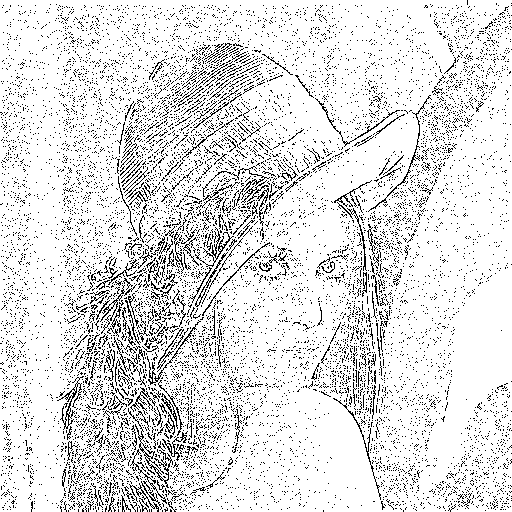

In [4]:
mask={(0,0):-4, (0,-1):1, (0,1):1, (1,0):1, (-1,0):1}
kernel = [(-1,-1), (-1,0), (-1,1), (0,-1), (0,1), (1,-1), (1,0), (1,1)]
save_image(laplace(img, mask, kernel, n=1, th=15), './laplace_1.bmp')

## b. Prewitt's Edge Detector: 24

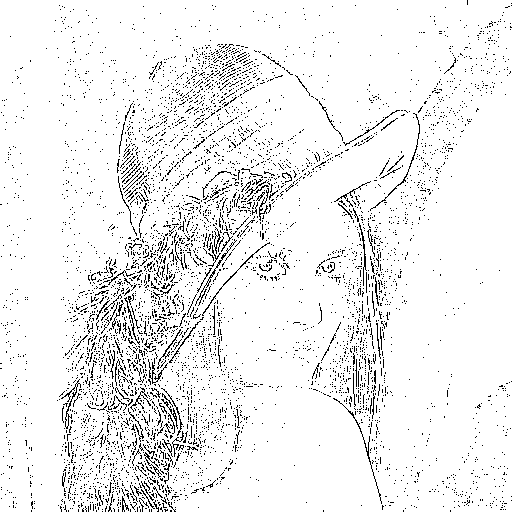

In [5]:
mask={(-1,-1):1/3, (-1,0):1/3, (-1,1):1/3, (0,-1):1/3, (0,0):-8/3, (0,1):1/3, (1,-1):1/3, (1,0):1/3, (1,1):1/3}
kernel = [(-1,-1), (-1,0), (-1,1), (0,-1), (0,1), (1,-1), (1,0), (1,1)]
save_image(laplace(img, mask, kernel, n=1, th=15), './laplace_2.bmp')

## c. Minimum variance Laplacian: 20

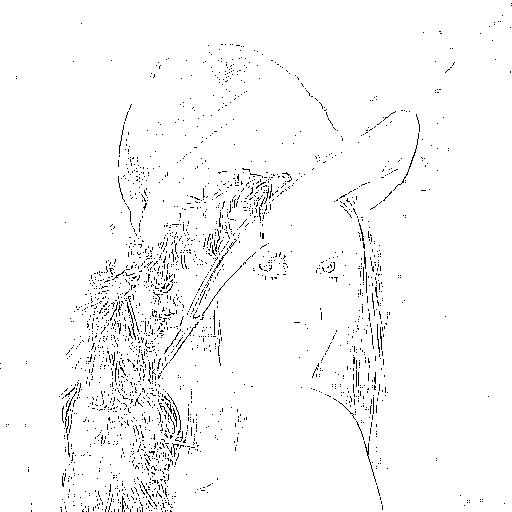

In [6]:
mask={(-1,-1):2/3, (-1,0):-1/3, (-1,1):2/3, (0,-1):-1/3, (0,0):-4/3, (0,1):-1/3, (1,-1):2/3, (1,0):-1/3, (1,1):2/3}
kernel = [(-1,-1), (-1,0), (-1,1), (0,-1), (0,1), (1,-1), (1,0), (1,1)]
save_image(laplace(img, mask, kernel, n=1, th=20), './min_var_laplace.bmp')

## d. Laplace of Gaussian: 3000

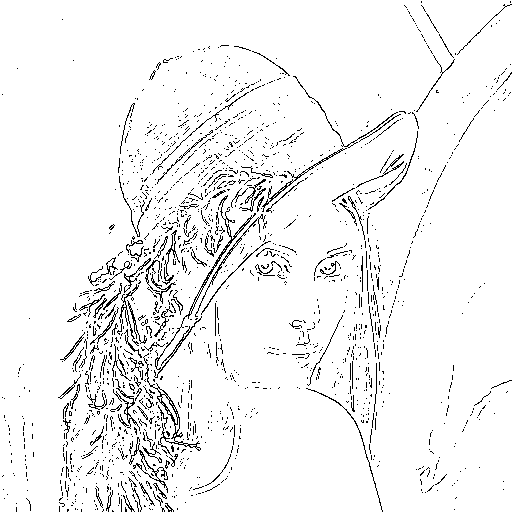

In [7]:
mask={(-5,-5):0, (-5,-4):0, (-5,-3):0, (-5,-2):-1, (-5,-1):-1, (-5,0):-2, (-5,1):-1, (-5,2):-1, (-5,3):0, (-5,4):0, (-5,5):0, 
      (-4,-5):0, (-4,-4):0, (-4,-3):-2, (-4,-2):-4, (-4,-1):-8, (-4,0):-9, (-4,1):-8, (-4,2):-4, (-4,3):-2, (-4,4):0, (-4,5):0, 
      (-3,-5):0, (-3,-4):-2, (-3,-3):-7, (-3,-2):-15, (-3,-1):-22, (-3,0):-23, (-3,1):-22, (-3,2):-15, (-3,3):-7, (-3,4):-2, (-3,5):0, 
      (-2,-5):-1, (-2,-4):-4, (-2,-3):-15, (-2,-2):-24, (-2,-1):-14, (-2,0):-1, (-2,1):-14, (-2,2):-24, (-2,3):-15, (-2,4):-4, (-2,5):-1, 
      (-1,-5):-1, (-1,-4):-8, (-1,-3):-22, (-1,-2):-14, (-1,-1):52, (-1,0):103, (-1,1):52, (-1,2):-14, (-1,3):-22, (-1,4):-8, (-1,5):-1, 
      (0,-5):-2, (0,-4):-9, (0,-3):-23, (0,-2):-1, (0,-1):103, (0,0):178, (0,1):103, (0,2):-1, (0,3):-23, (0,4):-9, (0,5):-2, (1,-5):-1, 
      (1,-4):-8, (1,-3):-22, (1,-2):-14, (1,-1):52, (1,0):103, (1,1):52, (1,2):-14, (1,3):-22, (1,4):-8, (1,5):-1, 
      (2,-5):-1, (2,-4):-4, (2,-3):-15, (2,-2):-24, (2,-1):-14, (2,0):-1, (2,1):-14, (2,2):-24, (2,3):-15, (2,4):-4, (2,5):-1, 
      (3,-5):0, (3,-4):-2, (3,-3):-7, (3,-2):-15, (3,-1):-22, (3,0):-23, (3,1):-22, (3,2):-15, (3,3):-7, (3,4):-2, (3,5):0, 
      (4,-5):0, (4,-4):0, (4,-3):-2, (4,-2):-4, (4,-1):-8, (4,0):-9, (4,1):-8, (4,2):-4, (4,3):-2, (4,4):0, (4,5):0, 
      (5,-5):0, (5,-4):0, (5,-3):0, (5,-2):-1, (5,-1):-1, (5,0):-2, (5,1):-1, (5,2):-1, (5,3):0, (5,4):0, (5,5):0}
kernel = [(-1,-1), (-1,0), (-1,1), (0,-1), (0,1), (1,-1), (1,0), (1,1)]
save_image(laplace(img, mask, kernel, n=5, th=3000), './laplace_of_gaussian.bmp')

## e. Difference of Gaussian: 1

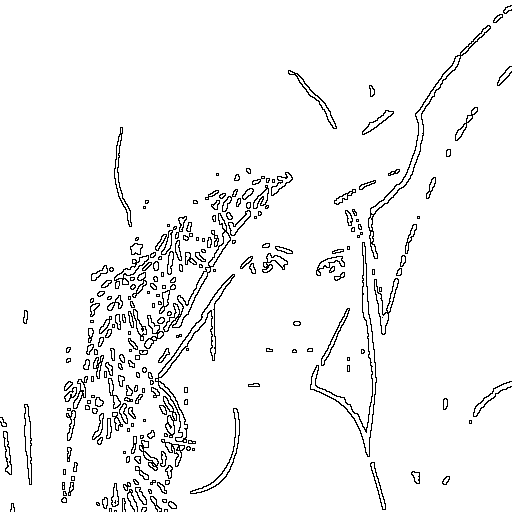

In [8]:
mask={(-5,-5):-1, (-5,-4):-3, (-5,-3):-4, (-5,-2):-6, (-5,-1):-7, (-5,0):-8, (-5,1):-7, (-5,2):-6, (-5,3):-4, (-5,4):-3, (-5,5):-1, 
      (-4,-5):-3, (-4,-4):-5, (-4,-3):-8, (-4,-2):-11, (-4,-1):-13, (-4,0):-13, (-4,1):-13, (-4,2):-11, (-4,3):-8, (-4,4):-5, (-4,5):-3, 
      (-3,-5):-4, (-3,-4):-8, (-3,-3):-12, (-3,-2):-16, (-3,-1):-17, (-3,0):-17, (-3,1):-17, (-3,2):-16, (-3,3):-12, (-3,4):-8, (-3,5):-4, 
      (-2,-5):-6, (-2,-4):-11, (-2,-3):-16, (-2,-2):-16, (-2,-1):0, (-2,0):15, (-2,1):0, (-2,2):-16, (-2,3):-16, (-2,4):-11, (-2,5):-6, 
      (-1,-5):-7, (-1,-4):-13, (-1,-3):-17, (-1,-2):0, (-1,-1):85, (-1,0):160, (-1,1):85, (-1,2):0, (-1,3):-17, (-1,4):-13, (-1,5):-7, 
      (0,-5):-8, (0,-4):-13, (0,-3):-17, (0,-2):15, (0,-1):160, (0,0):283, (0,1):160, (0,2):15, (0,3):-17, (0,4):-13, (0,5):-8, 
      (1,-5):-7, (1,-4):-13, (1,-3):-17, (1,-2):0, (1,-1):85, (1,0):160, (1,1):85, (1,2):0, (1,3):-17, (1,4):-13, (1,5):-7, 
      (2,-5):-6, (2,-4):-11, (2,-3):-16, (2,-2):-16, (2,-1):0, (2,0):15, (2,1):0, (2,2):-16, (2,3):-16, (2,4):-11, (2,5):-6, 
      (3,-5):-4, (3,-4):-8, (3,-3):-12, (3,-2):-16, (3,-1):-17, (3,0):-17, (3,1):-17, (3,2):-16, (3,3):-12, (3,4):-8, (3,5):-4, 
      (4,-5):-3, (4,-4):-5, (4,-3):-8, (4,-2):-11, (4,-1):-13, (4,0):-13, (4,1):-13, (4,2):-11, (4,3):-8, (4,4):-5, (4,5):-3, 
      (5,-5):-1, (5,-4):-3, (5,-3):-4, (5,-2):-6, (5,-1):-7, (5,0):-8, (5,1):-7, (5,2):-6, (5,3):-4, (5,4):-3, (5,5):-1, }
kernel = [(-1,-1), (-1,0), (-1,1), (0,-1), (0,1), (1,-1), (1,0), (1,1)]
save_image(laplace(img, mask, kernel, n=5, th=1), './difference_of_gaussian.bmp')